In [0]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.2.0-rc3
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [0]:
import IPython.display as display
from tensorflow.keras.preprocessing import image
import PIL.Image

def normalize_image(img):
  img = 255 *(img + 1.0) /2.0
  return tf.cast(img, tf.uint8)

def show_image(img):
  display.display(PIL.Image.fromarray(np.array(img)))

def save_image(img,file_name):
  pass


In [0]:
base_model = tf.keras.applications.InceptionV3(include_top = False,
                        weights='imagenet')
base_model.summary()

In [0]:
layer_names = 'conv2d_85'
layer_names = ['mixed0']
layers = [base_model.get_layer(name).output for name in layer_names]
layers
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

def calc_loss(img, model):
  #channel = [13,139]
  img=tf.expand_dims(img, axis=0)
  layer_activations = model(img)
  losses = []
  for layer_act in layer_activations:
    #for cn in channel:
    #act = layer_activations[:,:,:,cn]
    
    loss = tf.math.reduce_mean(layer_act)
    losses.append(loss)
  return tf.reduce_sum(losses)

def render_deepdream(model, img, steps=100, step_size=0.01, verbose=1):
  for n in tf.range(steps):
    with tf.GradientTape() as tape:
      tape.watch(img)
      loss = calc_loss(img, model)

    grad = tape.gradient(loss, img)
    grad /= tf.math.reduce_std(grad) + 1e-8

    img += grad * step_size
    img = tf.clip_by_value(img, -1, 1)
    if (verbose == 1):
      print("step {} /{}, loss {}".format(n+1, steps, loss))

  return img

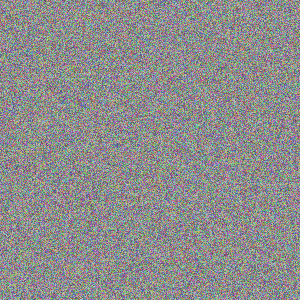

In [0]:
import numpy as np

img_noise = np.random.uniform(size=(300,300,3)) + 100.0
img_noise = img_noise.astype(np.float32)
show_image(normalize_image(img_noise))
img = tf.keras.applications.inception_v3.preprocess_input(img_noise)
img = tf.convert_to_tensor(img)



begin
step 1 /80, loss 0.6770449280738831
step 2 /80, loss 0.596328616142273
step 3 /80, loss 0.6392150521278381
step 4 /80, loss 0.6715582013130188
step 5 /80, loss 0.6999620199203491
step 6 /80, loss 0.7262865900993347
step 7 /80, loss 0.749779224395752
step 8 /80, loss 0.7722007632255554
step 9 /80, loss 0.7930264472961426
step 10 /80, loss 0.8134315013885498
step 11 /80, loss 0.8318289518356323
step 12 /80, loss 0.8505221605300903
step 13 /80, loss 0.8674010634422302
step 14 /80, loss 0.8846791386604309
step 15 /80, loss 0.9004135727882385
step 16 /80, loss 0.9161655902862549
step 17 /80, loss 0.930439829826355
step 18 /80, loss 0.945380687713623
step 19 /80, loss 0.9589133262634277
step 20 /80, loss 0.972516655921936
step 21 /80, loss 0.9857293367385864
step 22 /80, loss 0.9986101984977722
step 23 /80, loss 1.0114785432815552
step 24 /80, loss 1.0232748985290527
step 25 /80, loss 1.0352412462234497
step 26 /80, loss 1.0469919443130493
step 27 /80, loss 1.0584745407104492
step 28 /

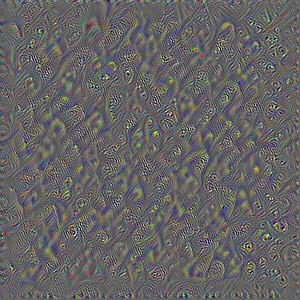

In [0]:
import time
start = time.time()
print("begin")

dream_img = render_deepdream(dream_model, img, steps= 80, step_size=0.01)

end = time.time()

show_image(normalize_image(dream_img))